In [1]:
using OrdinaryDiffEq, LaTeXStrings, Plots, Printf;


In [2]:
tspan = (0.0, 100.0);
ϵ = 0.1
ϵ2 = 0.01


0.01

In [3]:
function duff1!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = -ϵ * (2 * du + u^3) - u
end


duff1! (generic function with 1 method)

In [4]:
function duff2!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = -ϵ2 * (2 * du + u^3) - u
end


duff2! (generic function with 1 method)

In [5]:
u0 = [1, 0]

prob1 = ODEProblem(duff1!, u0, tspan)
prob2 = ODEProblem(duff2!, u0, tspan)

sol1 = solve(prob1, Tsit5(), reltol = 1.0e-8, abstol = 1.0e-8);
sol2 = solve(prob2, Tsit5(), reltol = 1.0e-8, abstol = 1.0e-8);


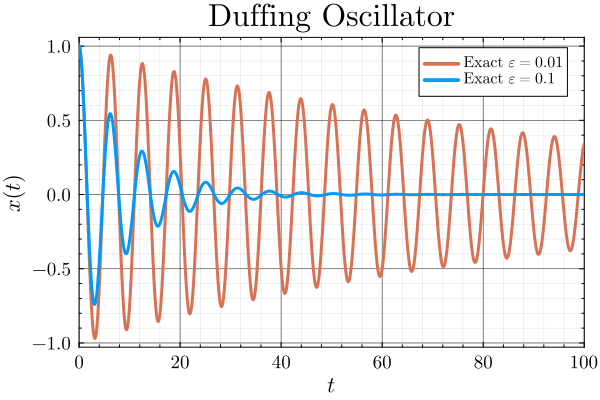

In [6]:
theme(:dao::Symbol)
plot(
    sol2,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ2"
)
plot!(
    sol1,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ",
    title = "Duffing Oscillator",
    xlabel = L"$t$",
    ylabel = L"$x(t)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm,
    # xlims = (0, 20)
)
# savefig("Aero_Exam2_Prob2_exact.pdf")


In [13]:
ɸ₀(t) = 0 # (3 / 16) * exp(-2 * ϵ * t) # atan(1 / 2, sqrt(15) / 6)
A(t, ϵ) = (sqrt(2) / sqrt(5 * exp(2 * ϵ * t) - 3)) * exp(im * ɸ₀(t))

approx(t, ϵ) = A(t, ϵ) .* exp(im * t) .+ (ϵ / 8) * A(t, ϵ) .^ 3 .* exp(3 * im * t);
tvals = LinRange(tspan[1], tspan[2], 10000);


In [ ]:
plot(
    sol2,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ2"
)
plot!(
    sol1,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ",
    title = "Duffing Oscillator: Solutions",
    xlabel = L"$t$",
    ylabel = L"$x(t)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm,
    # xlims = (0, 20)
)

plot!(
    tvals, real.(approx.(tvals, ϵ2)),
    line = (3, :dash),
    label = L"Approx $\epsilon = $%$ϵ2",
)
plot!(
    tvals, real.(approx.(tvals, ϵ)),
    line = (3, :dash),
    label = L"Approx $\epsilon = $%$ϵ",
)
# savefig("Aero_Exam2_Prob2_compare100.pdf")


"/home/belster/JuliaFiles/Aero/exam2/Aero_Exam2_Prob2_compare100.pdf"